In [ ]:
print("hello")

hello


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('stud.csv')

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
print("categories of gender variables :  ",end=" ")
print(df['gender'].unique())
print("categories of race_ethnicity variables :  ",end=" ")
print(df['race_ethnicity'].unique())
print("categories of parental_level_of_education variables :  ",end=" ")
print(df['parental_level_of_education'].unique())
print("categories of lunch variables :  ",end=" ")
print(df['lunch'].unique())
print("categories of test_preparation_course variables :  ",end=" ")
print(df['test_preparation_course'].unique())


categories of gender variables :   ['female' 'male']
categories of race_ethnicity variables :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories of parental_level_of_education variables :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories of lunch variables :   ['standard' 'free/reduced']
categories of test_preparation_course variables :   ['none' 'completed']


In [ ]:
num_feat=[feat for feat in df.columns if df[feat].dtype!='O']
cat_feat=[feat for feat in df.columns if df[feat].dtype=='O']


print('we have {} numerical feature :{}'.format(len(num_feat),num_feat))
print('we have {} numerical feature :{}'.format(len(cat_feat),cat_feat))

we have 3 numerical feature :['math_score', 'reading_score', 'writing_score']
we have 5 numerical feature :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full=df[df['reading_score']==100]['avg'].count()
writing_full=df[df['writing_score']==100]['avg'].count()
math_score=df[df['math_score']==100]['avg'].count()
print('reading_full :{}'.format(reading_full))
print('writing_full :{} '.format(writing_full))
print('math_score :{} '.format(math_score))

reading_full :17
writing_full :14 
math_score :7 


In [ ]:
reading_less=df[df['reading_score']<=20]['avg'].count()
writing_less=df[df['writing_score']<=20]['avg'].count()
math_less=df[df['math_score']<=20]['avg'].count()

print(f"number of student with less 20 marks is:{reading_less}")
print(f"number of student with less 20 marks is:{writing_less}")
print(f"number of student with less 20 marks is:{math_less}")

number of student with less 20 marks is:1
number of student with less 20 marks is:3
number of student with less 20 marks is:4


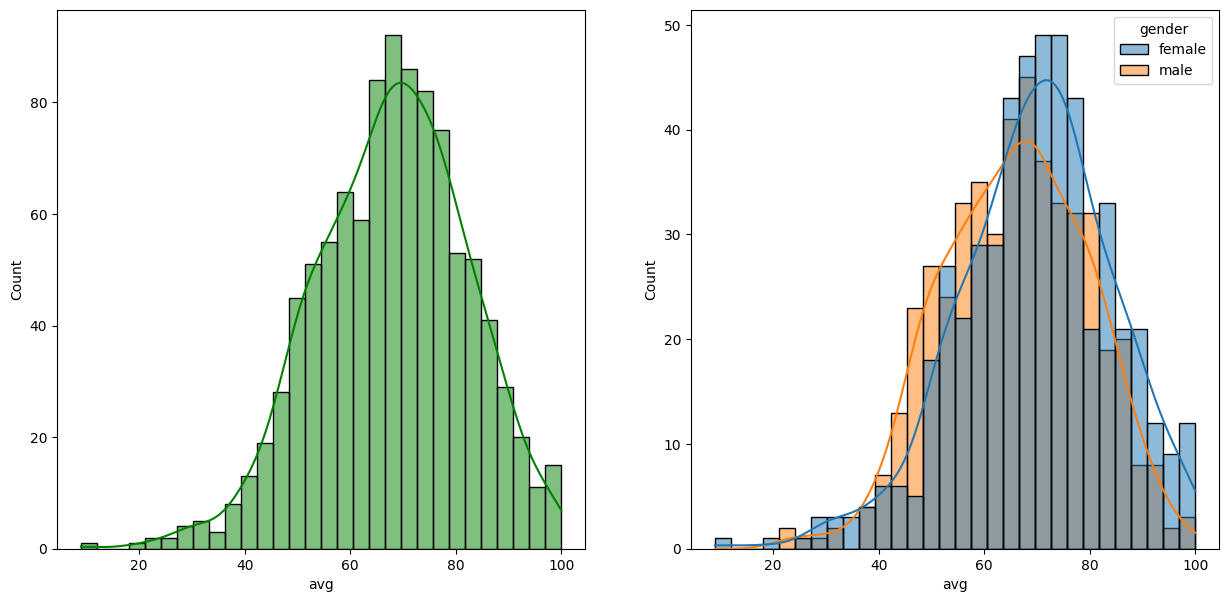

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='gender')
plt.show()

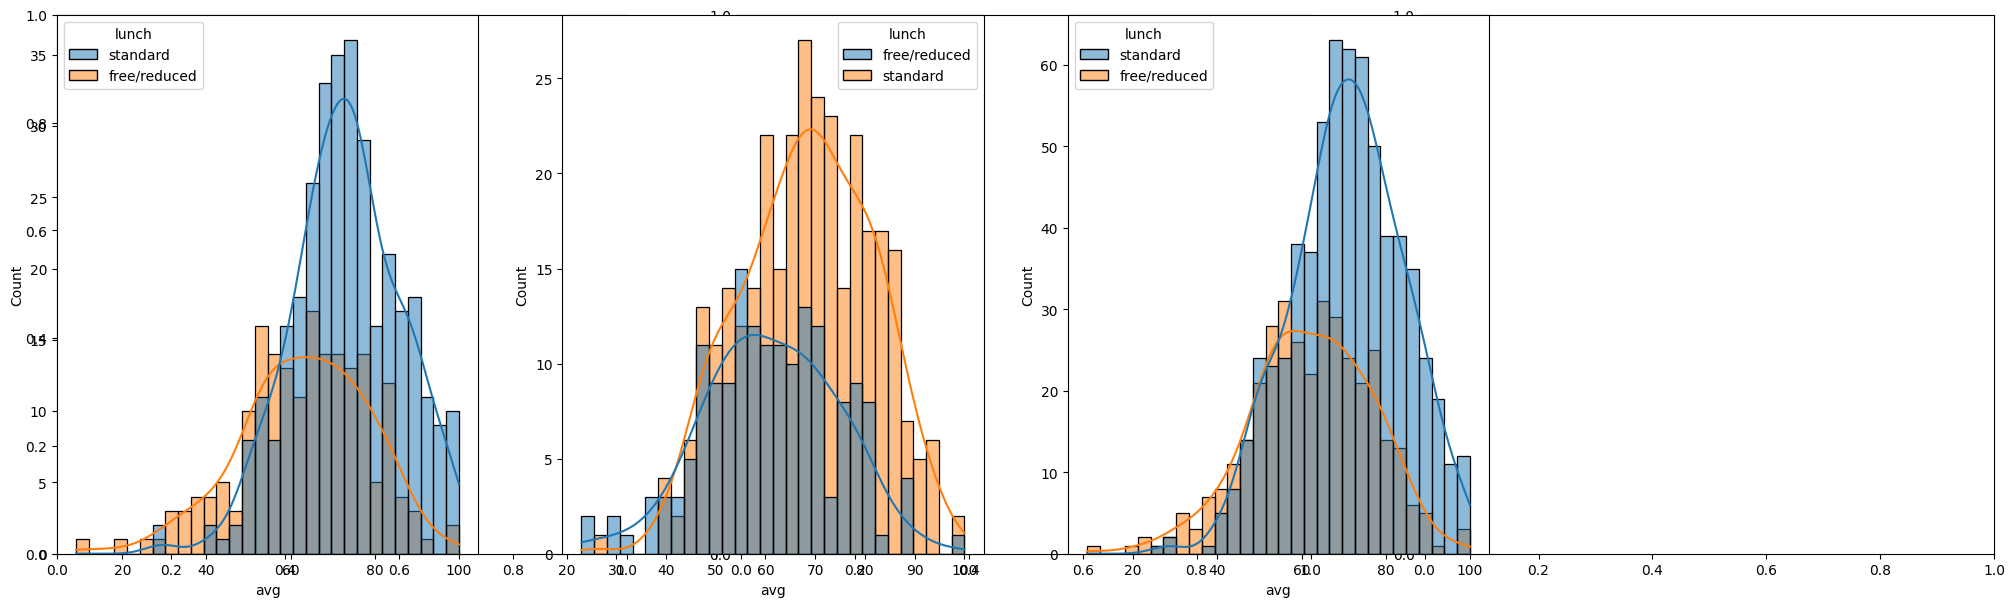

In [ ]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='female'],x='avg',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avg',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='lunch')
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()